# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****
</div>

In [1]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

In [30]:
# Your work here.
import matplotlib.pyplot as plt 
import numpy as np
%matplotlib inline
import scipy.stats

## 1. Is the distribution of body temperature normal?

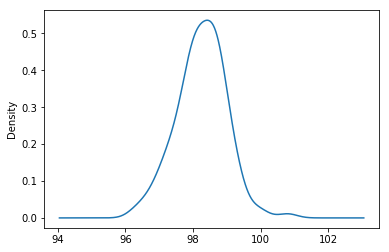

In [8]:
df.temperature.plot(kind = 'kde')


#### Visually the above looks like a normal distribution, but lets plot it along with a normal

In [13]:
mu = df.temperature.mean()
sigma = df.temperature.std()
mu,sigma

(98.24923076923078, 0.7331831580389454)

In [15]:
norm_rv = scipy.stats.norm(mu,sigma)

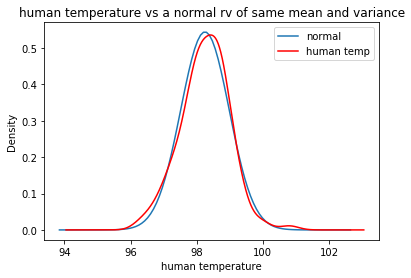

In [29]:
x = np.linspace(mu-6*sigma, mu+6*sigma,num=100)
y = norm_rv.pdf(x)
plt.plot(x,y)
plt.hold
df.temperature.plot(kind = 'kde', color = 'r')
plt.legend(['normal','human temp'])
plt.xlabel('human temperature')
plt.title('human temperature vs a normal rv of same mean and variance')

### ok, the above does look fairly overlapping with a normal distribution!

## 2. Is the sample size large? Are the observations independent?

Whether the sample is large enough or not depends on the effect we are trying to measure and the precision we desire. In this case we are trying to measure whether the estimated population mean is significantly different than 98.6. Assume we desire a precision of 0.1 deg F. The estimator of population mean has a 
                     
                     standard error = (sample standard deviation)/(Sqrt(num of samples))
So if we desire the standard error within +/- 0.1 deg F, then number of samples should be at least 

In [37]:
(sigma/0.1)**2

53.75575432319612

Instead if we are more demanding, and say we desire 99% confidence interval within +/- 0.1 then that would imply a standard error 2.5 times tighter than 0.1, making the sample size requirement of at least:

In [38]:
(sigma/(0.1/2.5))**2

335.9734645199757

So lets count how many samples do we have

In [39]:
len(df)

130

So, in this case, the sample is large enough to keep standard error within +/- 0.1 of 98.6. But not large enough for 99% confidence interval being within 0.1

### Now coming to the independence of the sample

All that is stated above is assuming samples are collected independently. To be more precise, a perfectly random sample is that in which each point of the population has an equal likelyhood to be picked in our sample and is picked without any influence by which other points are picked in our sample. 

Since we do not have the original population, how can we comment on whether this is a perfectly random sample of it? 
1. By looking at some other properties of the data-set
2. By trying to find some correlation among temperatures sampled? (Does it even mean anything to find correlation of two scalers?)

In [41]:
df['gender'].value_counts()

M    65
F    65
Name: gender, dtype: int64

Equal number of male and females in the sample is a sign of no genderbias in the selection

Not sure how to make any use of heart-rate data to ascertain independence of the sample. So will skip this for now

## 3. Is the true population mean really 98.6 degrees F?

Ok lets make a hypothesis that the true population mean is indeed 98.6 degrees F. Lets call that the null hypothesis H0. 
Suppose our sample is a result of completely random sampling experiment from the population. How likely is that our sample mean is slightly different from 98.6 just by chance? 

In [42]:
mu

98.24923076923078

In [94]:
stdErr = sigma/np.sqrt(len(df)-1)
stdErr

0.064553177599807263

Since we are testing wheher a sample mean is (statitically) same as a known population mean, we should do one sample t-test. 
Two sample tests is to be used when we are comparing two independent samples from a population. 
The appropriate test statistic in one sample test is t-statistic. This is because the sample mean of n observations normalized by sample standard deviation follows a Student's t distribution with (n-1) degrees of freedom

In [51]:
tstat = abs(mu - 98.6)/stdErr
tstat

5.4338027005236693

In [68]:
t_rv = scipy.stats.t(len(df)-1) #Specfity a Student's t-distribution with n-1 degrees of freedom

In [69]:
t_rv.cdf(tstat)

0.99999986732676271

In [75]:
#We can do all the above steps in one command as well!
scipy.stats.ttest_1samp(df.temperature,98.6)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

### The hypothesis that population mean = 98.6 is rejected with 99.9999 % confidence
(This could still be a wrong conclusion due to measurement error or sampling error which are hard to quantity)

## 4. At what level should we consider someone's temperature abormal

Lets say if some's temparature is outside 90% confidence interval around the mean. 

ok with some googling, and help search I am unable to find inverse CDF function in scipy.stats. So lets generate some t-distrubuted rvs and get score at a given percentile

In [87]:
t_rvs = t_rv.rvs(size=1000)

In [91]:
t_90 = scipy.stats.scoreatpercentile(t_rvs, 95)   # score at 95 percentile should correspond to 2*(100 - 95) = 90 % confidence.

In [96]:
(mu + t_90*sigma, mu - t_90*sigma)   #The range out of which you can consider someone's temperature abnormal

(99.501069913395071, 96.997391625066484)

### Something is bizarre here! If temperature is normally distributed, why did we use t distrubution above!!?

## 5. Is there a significant difference between males and females in normal temperature?

Here we should use the two sample t-test. The null hypothesis can be that males and females are two indepdent random sample from the population with identical population means. 

In [99]:
scipy.stats.ttest_ind(df.temperature[df.gender == 'F'],df.temperature[df.gender == 'M'])

Ttest_indResult(statistic=2.2854345381656103, pvalue=0.023931883122395609)

### So, males and females do have a statistically significant difference in means!

In [102]:
df.temperature[df.gender == 'F'].mean()

98.39384615384613

In [103]:
df.temperature[df.gender == 'M'].mean()

98.1046153846154